<a href="https://colab.research.google.com/github/mahnoorqadeerr/Spam_Email_Classifier/blob/main/Spam_Email_Classifier_Mahnoor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>Project Title: Email Spam Classifier using Naive Bayes

>Duration: 1 Day

>Tools Used: Python, Google Colab, scikit-learn, NLTK

>Description: Built a machine learning model to classify SMS messages as spam or not spam using the Naive Bayes algorithm. Preprocessed text data, converted it into numerical features using CountVectorizer, and achieved high accuracy on test data.

>Outcome: Successfully predicted spam messages
with over 98% accuracy. Demonstrated understanding of text classification, model training, and evaluation.


In [1]:
!pip install nltk scikit-learn pandas

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
data.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)


In [5]:
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [6]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [7]:
predictions = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.9883408071748879


In [8]:
sample = ["Congratulations! You've won a free ticket to Bahamas. Call now!"]
sample_vec = vectorizer.transform(sample)
print("Prediction:", model.predict(sample_vec))  # 1 = spam, 0 = ham


Prediction: [1]


In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_lr = LogisticRegression()
model_lr.fit(X_train_vec, y_train)
y_pred_lr = model_lr.predict(X_test_vec)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [11]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train_vec, y_train)
y_pred_svm = model_svm.predict(X_test_vec)

print("SVM Results:")
print(classification_report(y_test, y_pred_svm))


SVM Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



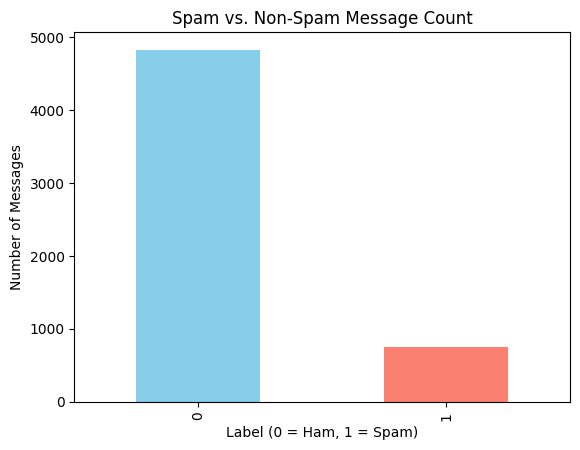

In [12]:
import matplotlib.pyplot as plt

data['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Spam vs. Non-Spam Message Count')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Number of Messages')
plt.show()


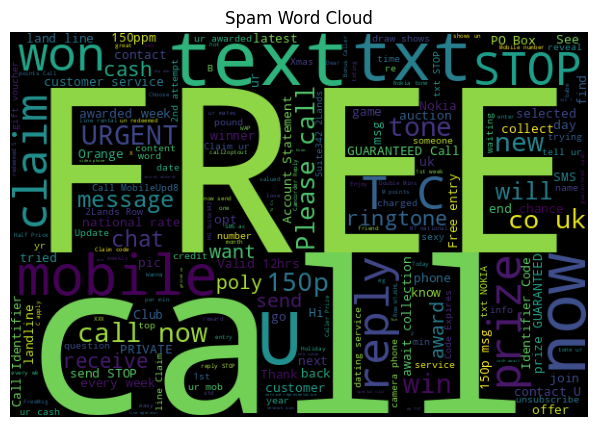

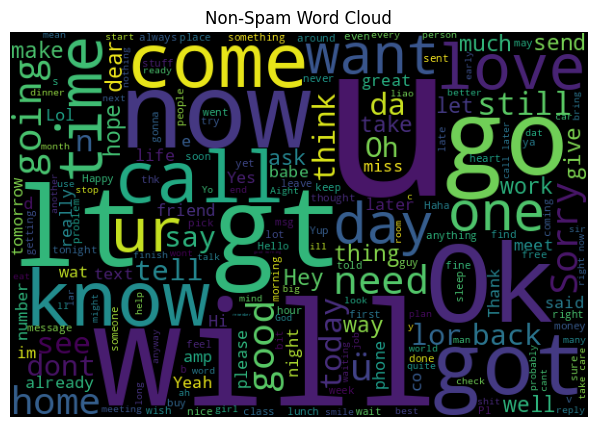

In [13]:
from wordcloud import WordCloud

# Spam messages
spam_words = ' '.join(data[data['label'] == 1]['message'])
spam_wc = WordCloud(width=600, height=400).generate(spam_words)

# Non-spam messages
ham_words = ' '.join(data[data['label'] == 0]['message'])
ham_wc = WordCloud(width=600, height=400).generate(ham_words)

# Plot both
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc)
plt.axis('off')
plt.title('Spam Word Cloud')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(ham_wc)
plt.axis('off')
plt.title('Non-Spam Word Cloud')
plt.show()


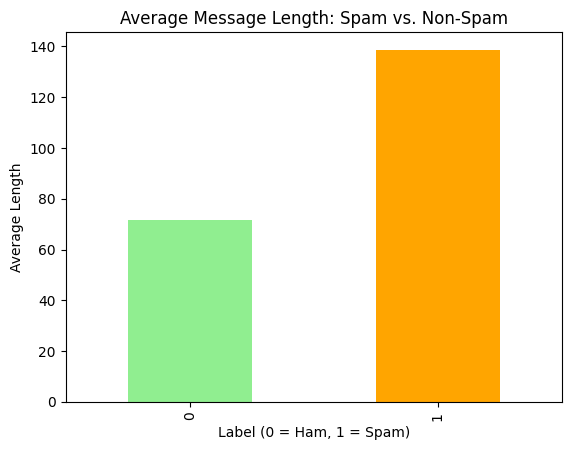

In [14]:
data['length'] = data['message'].apply(len)
data.groupby('label')['length'].mean().plot(kind='bar', color=['lightgreen', 'orange'])
plt.title('Average Message Length: Spam vs. Non-Spam')
plt.xlabel('Label (0 = Ham, 1 = Spam)')
plt.ylabel('Average Length')
plt.show()


| Model               | Accuracy | Precision | Recall | F1-Score |
|--------------------|----------|-----------|--------|----------|
| Naive Bayes        | 0.99     | 0.97      | 0.95   | 0.96     |
| Logistic Regression| 0.99     | 1.00      | 0.89   | 0.94     |
| SVM                | 0.99     | 1.00      | 0.89   | 0.94     |


This project demonstrates a complete pipeline for detecting spam messages using machine learning. After preprocessing the data and exploring it through visualizations, I trained and evaluated three models: Naive Bayes, Logistic Regression, and Support Vector Machine (SVM).

All models achieved high accuracy (99%), but their behavior differed:

>Naive Bayes had the highest recall, making it best at catching spam—even if it occasionally mislabels normal messages.

>Logistic Regression and SVM had perfect precision, meaning they avoided false positives but missed some spam.

Depending on the goal, Naive Bayes is ideal for aggressive spam filtering, while Logistic Regression and SVM are better for minimizing errors on legitimate messages. This comparison highlights the importance of choosing models based on the specific needs of a task—not just accuracy.